In [1]:
import numpy as np
from numpy.linalg import svd

def robust_pca(D, lam=None, mu=None, max_iter=1000, tol=1e-7):
    """
    implement of Robust PCA using the Alternating Direction Method of Multipliers (ADMM) algorithm
    """

    m, n = D.shape
    if lam is None:
        lam = 1 / np.sqrt(max(m, n))
    if mu is None:
        mu = (m * n) / (4 * np.linalg.norm(D, ord=1))
    
    # Initialize variables
    L = np.zeros((m, n))
    S = np.zeros((m, n))
    Y = np.zeros((m, n))
    
    for iter in range(max_iter):
        # Update Low-Rank component
        U, sigma, V = svd(D - S + (1/mu)*Y, full_matrices=False)
        sigma_shrink = np.maximum(sigma - (1/mu), 0)
        L_new = U @ np.diag(sigma_shrink) @ V
        
        # Update Sparse component
        S_new = np.maximum(D - L_new + (1/mu)*Y - lam/mu, 0) + \
                np.minimum(D - L_new + (1/mu)*Y + lam/mu, 0)
        
        # Check for convergence
        if np.linalg.norm(L_new - L, ord='fro') / np.linalg.norm(D, ord='fro') < tol and \
           np.linalg.norm(S_new - S, ord='fro') / np.linalg.norm(D, ord='fro') < tol:
            break
        
        L = L_new
        S = S_new
        Y = Y + mu * (D - L - S)
    
    return L, S


In [2]:
import create_data_upd as OD

len_test = 1000
rows = 400
cols = 10
sig1vt_supp=10
zt_noise_sigma=0.01

data = OD.Data(rows=rows, cols=cols, sig1vt_supp=sig1vt_supp, k_sparse=5,zt_noise_sigma=zt_noise_sigma)
X_dataset_test, C_dataset_test, Z_dataset_test = data.create_Dataset(len_test)


In [ ]:
Ss=np.zeros((len_test,rows,cols))
Ls=np.zeros((len_test,rows,cols))
rank_Ls=np.zeros((len_test,1))

for i in range (len_test):
    L,S=robust_pca(X_dataset_test[i,:,:])
    Ss[i,:,:]=S
    Ls[i,:,:]=L
    U, s, V = np.linalg.svd(L)
    # Determine the rank by counting non-zero singular values
    rank_L = np.sum(s > 1e-10) 
    rank_Ls[i]=rank_L
    print(f"The rank of L is: {rank_L}")


The rank of L is: 4
The rank of L is: 5
The rank of L is: 4
The rank of L is: 4
The rank of L is: 5
The rank of L is: 5
The rank of L is: 4
The rank of L is: 5
The rank of L is: 3
The rank of L is: 4
The rank of L is: 5
The rank of L is: 4
The rank of L is: 4
The rank of L is: 5
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 5
The rank of L is: 5
The rank of L is: 3
The rank of L is: 5
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 5
The rank of L is: 4
The rank of L is: 4
The rank of L is: 5
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 5
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 5
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 4
The rank of L is: 3
The rank of L is: 4
The rank of L is: 5
The rank of L is: 5


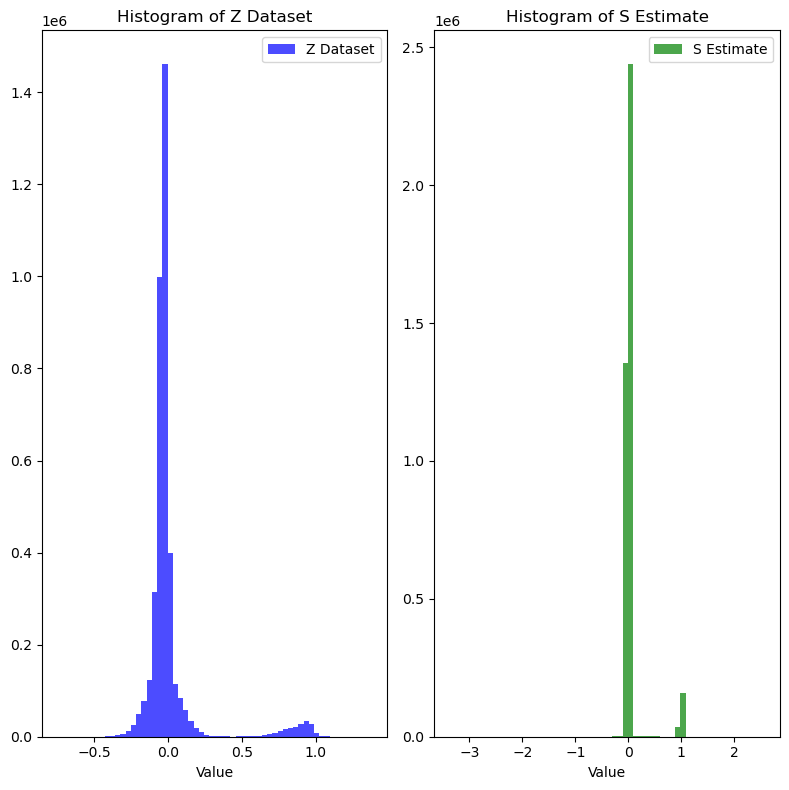

In [29]:
import torch
import matplotlib.pyplot as plt

# Load the data for Z
Z_dataset = Z_dataset_test.flatten()
S_estimate = Ss.flatten() 

# Setting up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(8, 8))  # 1 rows, 2 columns

# Histogram settings
bin_settings = 60  # Number of bins
alpha_setting = 0.7  # Transparency

# Determine combined limits for x-axis
combined_data = np.concatenate([Z_dataset, S_estimate])
x_min = combined_data.min()
x_max = combined_data.max()
xlims = (x_min, x_max)  # Define x-axis limits based on combined data

# Plot histograms
# Row for Z
axes[0].hist(Z_dataset, bins=bin_settings, alpha=alpha_setting, color='blue', label='Z Dataset')
axes[0].set_title('Histogram of Z Dataset')
axes[0].set_xlim(xlims) 
axes[1].hist(S_estimate, bins=bin_settings, alpha=alpha_setting, color='green', label='S Estimate')
axes[1].set_title('Histogram of S Estimate')
axes[1].set_xlim(xlims) 

for ax in axes.flat:
    ax.legend()
    ax.set_xlabel('Value')

plt.tight_layout()

plt.show(block=True)

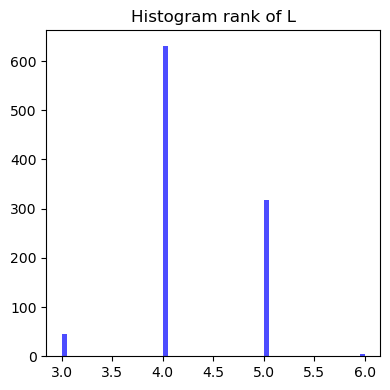

In [32]:
# Setting up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(4, 4))  # 1 rows, 2 columns

# Histogram settings
bin_settings = 60  # Number of bins
alpha_setting = 0.7  # Transparency

# Plot histograms
# Row for Z
axes.hist(rank_Ls, bins=bin_settings, alpha=alpha_setting, color='blue', label='rank_L')
axes.set_title('Histogram rank of L')


plt.tight_layout()

plt.show(block=True)
